In [29]:
import numpy as np
import pandas as pd

In [30]:
from sklearn.model_selection import train_test_split as tts

keys = pd.read_csv('FINAL DATASETS/Lillard Final Key.csv')

X_train, X_test, y_train, y_test = tts(keys['Tweet'], keys['Subject'], test_size = 0.2, random_state = 37)

In [31]:
y_train.value_counts(), y_test.value_counts()

(0    318
 3     66
 1     52
 2     44
 Name: Subject, dtype: int64,
 0    83
 3    14
 1    12
 2    11
 Name: Subject, dtype: int64)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
train_vectors = vectorizer.fit_transform(X_train)
validation_vectors = vectorizer.transform(X_test)

In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

classifier = MultinomialNB()
classifier.fit(train_vectors, y_train)

# Make predictions on the validation data
y_pred = classifier.predict(validation_vectors)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.78


In [34]:
classifier.class_count_

array([318.,  52.,  44.,  66.])

<AxesSubplot:>

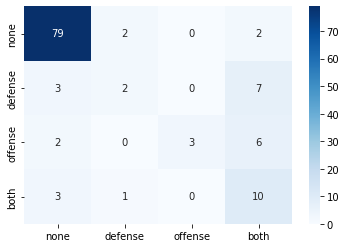

In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

## visualize the confusion matrix
cfm = confusion_matrix(y_test, y_pred)

## plot the confusion matrix
sns.heatmap(cfm, annot=True, fmt='d', cmap='Blues', xticklabels=['none', 'defense', 'offense', 'both'], yticklabels=['none', 'defense', 'offense', 'both'])

In [36]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_vectors, y_train)

y_pred = lr.predict(validation_vectors)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


<AxesSubplot:>

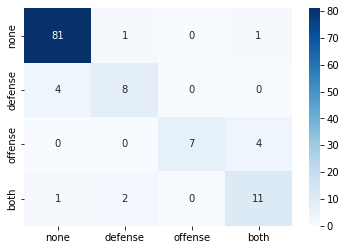

In [37]:
## visualize the confusion matrix
cfm = confusion_matrix(y_test, y_pred)

## plot the confusion matrix
sns.heatmap(cfm, annot=True, fmt='d', cmap='Blues', xticklabels=['none', 'defense', 'offense', 'both'], yticklabels=['none', 'defense', 'offense', 'both'])

In [38]:
data = pd.read_csv('FINAL DATASETS/Lillard Trade Final.csv')